In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
div.CodeMirror, div.CodeMirror pre, div.CodeMirror-code,
div.output_area pre, div.output_wrapper pre,
.text_cell_render, .text_cell_render *
{ font-family: Consolas; font-size: 15pt; line-height: 140%;}
</style>"""))

# 제출 방법
1. 파일 이름에서 '이름'을 자신의 이름으로 고치시오.
1. 제출 후 삭제하시오.


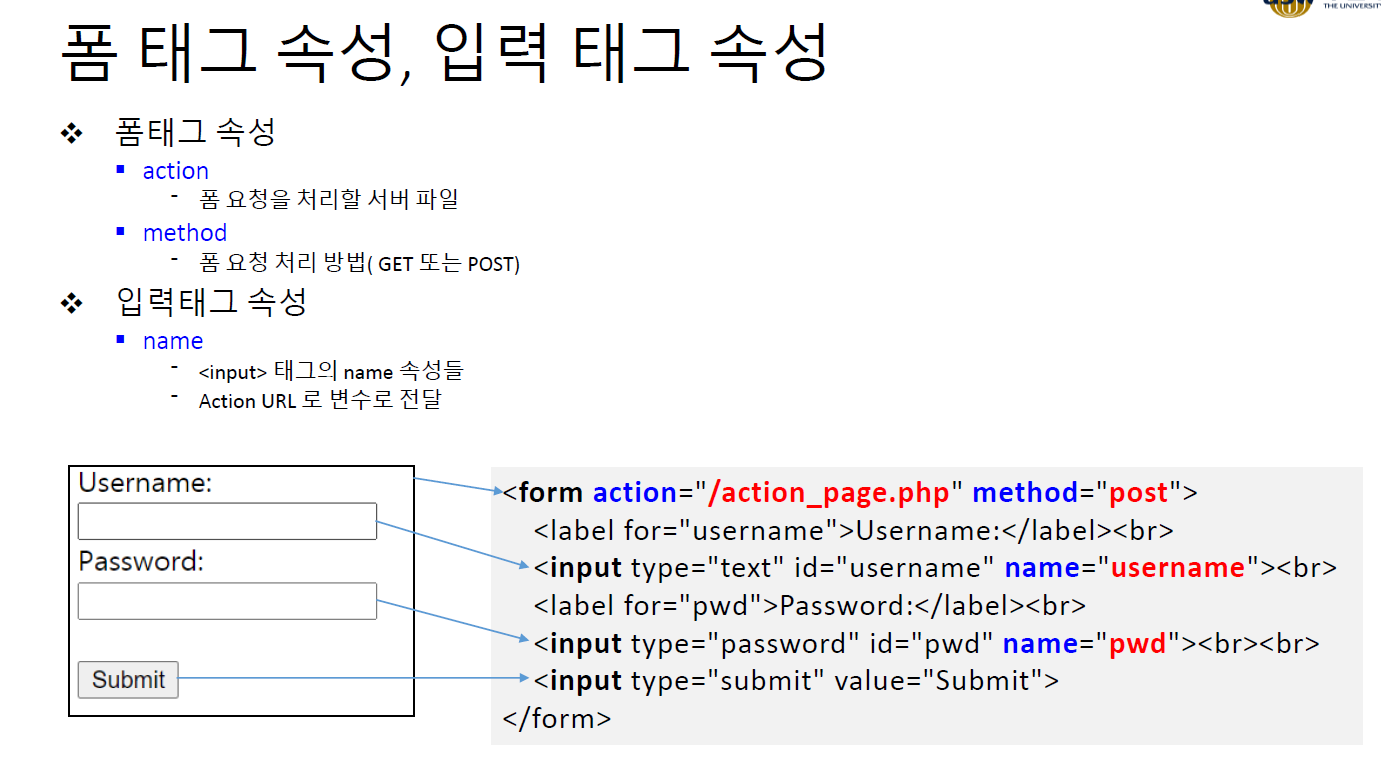

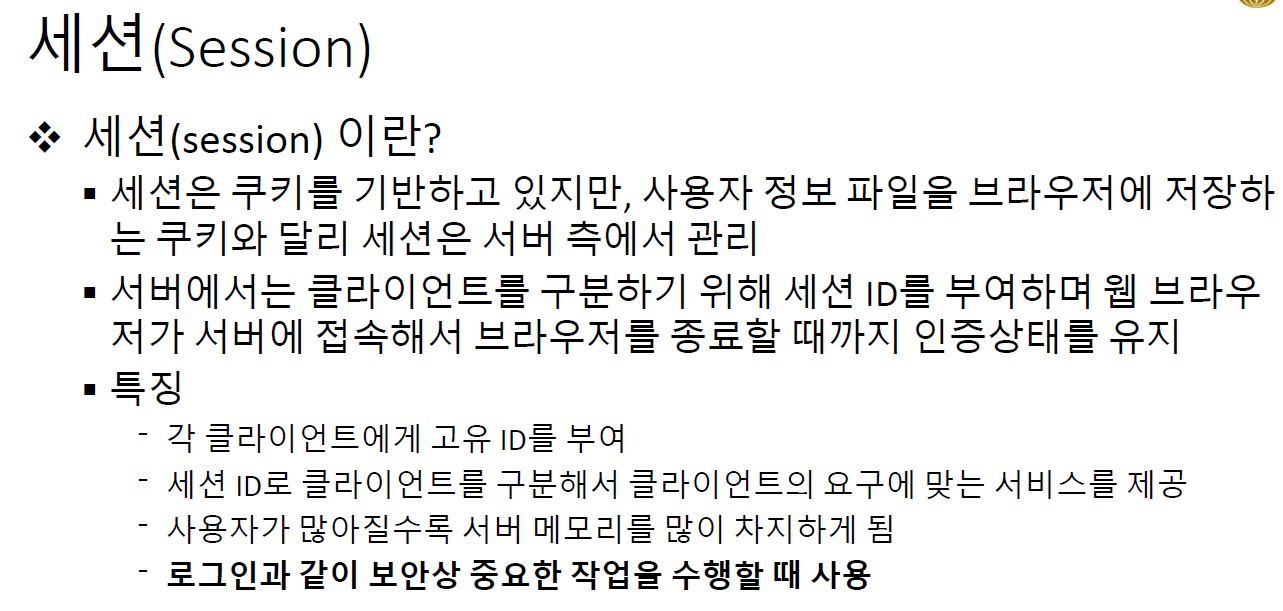

## 실습1

requests 라이브러리의 세션을 이용하여 아래 문제를 푸시오.

http://dowellcomputer.com/member/memberLoginForm.jsp 에 로그인하고 사용자 정보에서 email 주소를 추출 하시오.

추출한 email을 결과와 같이 출력하시오.

- 아이디: ds2023
- 비밀번호: 2023ds


***결과***
```
Email: smellycat@ds.ds
```

In [1]:
import requests as rq
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# 로그인 url
login_url = "http://dowellcomputer.com/member/memberLoginForm.jsp"

# 로그인 정보
login_info = {
    'memberID' : 'ds2023',
    'memberPassword' : '2023ds'
}

# 크롤링할 url
target_url = "http://dowellcomputer.com/member/memberUpdateForm.jsp?ID=ds2023"

#세션 만들기
with rq.Session() as s: # 파일 오픈할 때 with 사용
    ## action url 만들기
    login_res = s.get(login_url) # 로그인 페이지 요청
    login_soup = BeautifulSoup(login_res.text, 'lxml')
    action = login_soup.select_one('form').get('action')
    action_url = urljoin(login_url, action)
    #print(f"Action URL: {action_url}")
        
    ## login 요청
    action_res = s.post(action_url, data=login_info) # method가 post라서 get 사용 X
    print(f"Cookies: {dict(s.cookies)}")
            
    ## 사용자 정보(email 주소) 추출
    user_info_res = s.get(target_url)
    user_info_soup = BeautifulSoup(user_info_res.text, 'lxml')
    email = user_info_soup.select_one('input[name=memberEmail]').get('value')
    print(f"Email: {email}")


Cookies: {'JSESSIONID': '3DFE5C6723AA592CF7FDCDCC9B625E85'}
Email: smellycat@ds.ds
